In [2]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## 1. Importing three datasets

In [59]:
df_movie=pd.read_csv("C://Users//DELL//Downloads//python//Data science with Python 1//movies.dat"
                     , sep = '::', engine='python')
df_movie.columns =['MovieIDs','MovieName','generes']
df_movie.dropna(inplace=True)
df_movie.head()

,MovieIDs,MovieName,generes
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [60]:
df_rating = pd.read_csv("C://Users//DELL//Downloads//python//Data science with Python 1//ratings.dat",
                        sep='::', engine='python')
df_rating.columns =['ID','MovieID','Rating','TimeStamp']
df_rating.dropna(inplace=True)
df_rating.head()

,ID,MovieID,Rating,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [62]:
df_user = pd.read_csv("C://Users//DELL//Downloads//python//Data science with Python 1//users.dat",
                      sep='::',engine='python')
df_user.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_user.dropna(inplace=True)
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


### Create a new dataset [Master_Data] with the following columns
### MovieID Title UserID Age Gender Occupation Rating.

In [41]:


Master_Data = pd.concat([df_movie,df_user], axis=1)
Master_Data.head()

,MovieIDs,MovieName,Category,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,2,M,56,16,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,3,M,25,15,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,4,M,45,7,02460
3,5.0,Father of the Bride Part II (1995),Comedy,5,M,25,20,55455
4,6.0,Heat (1995),Action|Crime|Thriller,6,F,50,9,55117


#### User Age Distribution

Text(0.5, 0, 'Age')

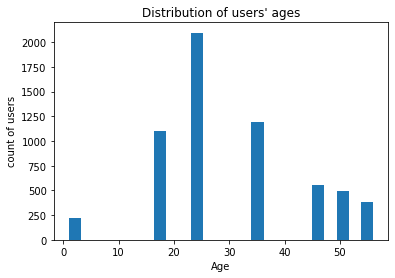

In [42]:
df.Age.plot.hist(bins=25)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('Age')

### User rating of the movie “Toy Story”

In [45]:
movies = df.groupby('MovieName').size().sort_values(ascending=True)[:1000]
print(movies)

MovieName
$1,000,000 Duck (1971)                                              1
Only Angels Have Wings (1939)                                       1
Only You (1994)                                                     1
Open Season (1996)                                                  1
Open Your Eyes (Abre los ojos) (1997)                               1
Operation Condor (Feiying gaiwak) (1990)                            1
Operation Condor 2 (Longxiong hudi) (1990)                          1
Operation Dumbo Drop (1995)                                         1
Opportunists, The (1999)                                            1
Opposite of Sex, The (1998)                                         1
Ordinary People (1980)                                              1
Orgazmo (1997)                                                      1
Original Gangstas (1996)                                            1
Onegin (1999)                                                       1
Original K

In [46]:
ToyStory_data = groupedby_movieName.get_group('Toy Story 2 (1999)')
ToyStory_data.shape

(1, 8)

### Top 25 movies by viewership rating

### Find the ratings for all the movies reviewed by
### for a particular user of user id = 2696

### Find out all the unique genres

In [66]:
#total number of unique movie genre
unique_genre=df_movie['generes'].unique().tolist()
len(unique_genre)

301

### Create a separate column for each genre category with a one-hot encoding ( 1 and 0)
### whether or not the movie belongs to that genre. 

In [35]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [65]:
#here we  make census of the genres:
genre_labels = set()
for s in df_movie['generes'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))
#counting how many times each of genres occur:
keyword_occurences, dum = count_word(df_movie, 'generes', genre_labels)
keyword_occurences

[['Drama', 1603],
 ['Comedy', 1199],
 ['Action', 503],
 ['Thriller', 492],
 ['Romance', 471],
 ['Horror', 343],
 ['Adventure', 283],
 ['Sci-Fi', 276],
 ["Children's", 250],
 ['Crime', 211],
 ['War', 143],
 ['Documentary', 127],
 ['Musical', 114],
 ['Mystery', 106],
 ['Animation', 104],
 ['Fantasy', 68],
 ['Western', 68],
 ['Film-Noir', 44]]

### Develop an appropriate model to predict the movie ratings

In [71]:
prediction_var=["ID","MovieID","TimeStamp"]

In [72]:
#from sklearn.cross_validation import train_test_split - not in use now
from sklearn.model_selection import train_test_split
#testing data size is of 33% of entire data
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.33, random_state =5)

In [75]:
train,test = train_test_split(df_rating,test_size=0.3)

In [77]:
x_train=train[prediction_var]
y_train=train["Rating"]
x_test=test[prediction_var]
y_test=test["Rating"]

In [78]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(700145, 3)
(300063, 3)
(700145,)
(300063,)


In [79]:
from sklearn.linear_model import LinearRegression
#fitting our model to train and test
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [81]:
from sklearn.linear_model import LinearRegression
#fitting our model to train and test
lm = LinearRegression(fit_intercept=True,normalize=False,copy_X=True,n_jobs=1)
model = lm.fit(x_train,y_train)

In [82]:
model.coef_

array([-6.53823540e-07, -6.53418437e-05, -2.37515863e-09])

In [83]:
coefficients = pd.concat([pd.DataFrame(x_train.columns),
                          pd.DataFrame(np.transpose(model.coef_))],
                         axis = 1)
coefficients

,0,0
0,ID,-6.538235e-07
1,MovieID,-6.534184e-05
2,TimeStamp,-2.375159e-09


In [84]:
pred_y = lm.predict(x_test)
pred_y

array([3.52479694, 3.68066779, 3.64372565, ..., 3.56718391, 3.63671685,
       3.49283044])

Text(0, 0.5, 'Predicted Y')

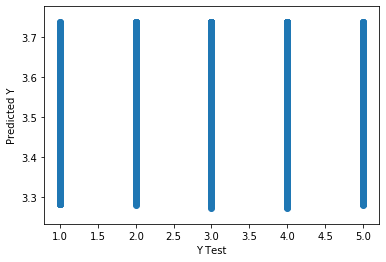

In [85]:
plt.scatter(y_test,pred_y)
plt.xlabel('Y Test') # Yactual error = sqrt(sum(Ya - Yp)^2/N) = 0
plt.ylabel('Predicted Y')

In [86]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error # (summ|yp-ya|/n-1
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [87]:
print(explained_variance_score(y_test,pred_y))
print(mean_absolute_error(y_test,pred_y))
print(mean_squared_error(y_test,pred_y))
print(r2_score(y_test,pred_y))

0.004194809296543256
0.9307022955721529
1.2447745129791796
0.004181915956337656
